In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data/BlackFriday.csv')
df.shape

(537577, 12)

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
for var in df:
    print(var, pd.unique(df[var]))

User_ID [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender ['F' 'M']
Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category ['A' 'C' 'B']
Stay_In_Current_City_Years ['2' '4+' '3' '1' '0']
Marital_Status [0 1]
Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase [ 8370 15200  1422 ... 14539 11120 18426]


[Text(0, 0, '0'),
 Text(0, 0, '50'),
 Text(0, 0, '100'),
 Text(0, 0, '150'),
 Text(0, 0, '200'),
 Text(0, 0, '250')]

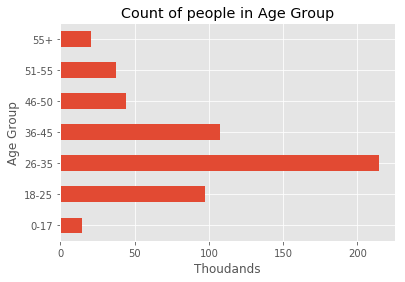

In [5]:
df1 = pd.crosstab(df['Age'], 'Count')
plt.style.use('ggplot')
ax = df1.plot.barh(legend=False)
ax.set(xlabel='Thousands',ylabel='Age Group',title='Count of people in Age Group')
vals=ax.get_xticks()
ax.set_xticklabels(['{:.0f}'.format(x/1000) for x in vals])

In [18]:
df3=df.pivot_table(values='Purchase', index=['Gender','Marital_Status'], columns='Age')
Marital_Status=['Not married','Married']
Gender=['Female','Male']
df3.index=df3.index.set_levels(Gender, level=0)
df3.index=df3.index.set_levels(Marital_Status, level=1)
df3.style.format('{:.0f}').highlight_null(null_color='red')

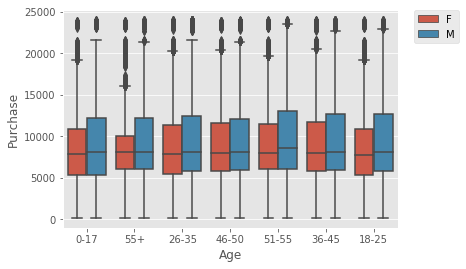

In [24]:
import seaborn as sns
sns.boxplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0, 0.5, 'People in Age Group')

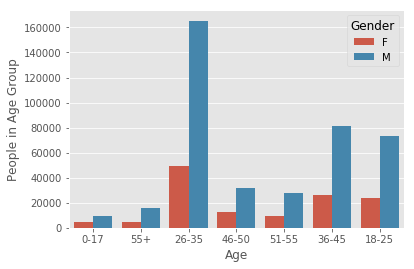

In [8]:
ax1 = sns.countplot(x='Age', data=df, hue='Gender')

ax1.set_ylabel('People in Age Group')

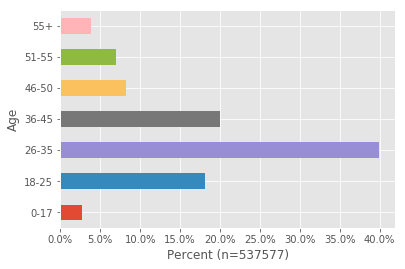

In [9]:
df4 = pd.crosstab(df['Age'], 'n')
df4['%'] = df4/df4.sum()*100

#Katsottu, että dataframe 4 antaa oikeanlaisen datan, mutta jatketaan suoraan graafiseen esitykseen.

from matplotlib.ticker import PercentFormatter

ax2=df4['%'].plot.barh()
n=df4['n'].sum()
ax2.set_xlabel('Percent (n='+str(n)+')')
ax2.xaxis.set_major_formatter(PercentFormatter(xmax=100))

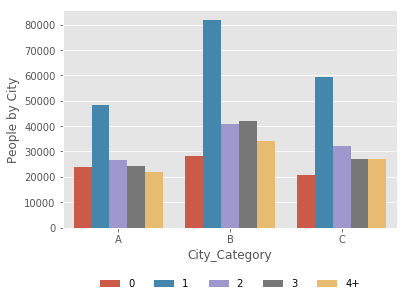

In [10]:
order=["A","B","C"]
ax3 = sns.countplot(x='City_Category', data=df, hue='Stay_In_Current_City_Years',
                    hue_order = ['0', '1', '2','3','4+'], order=order)
ax3.set_ylabel('People by City')
ax3.legend(loc=(0.1, -0.3), ncol=8, frameon=False)

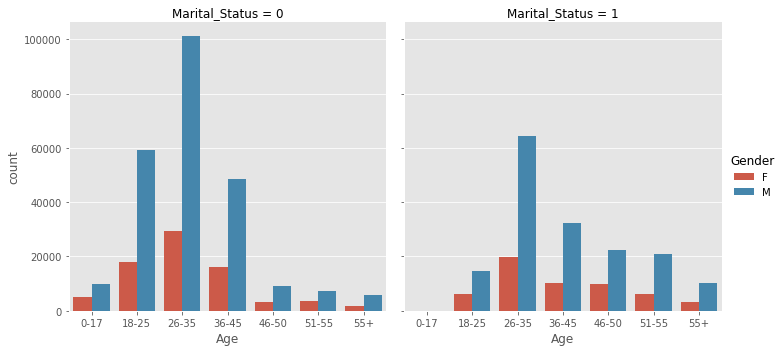

In [11]:
order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"]
sns.catplot(x='Age', col='Marital_Status', data=df, kind='count', hue='Gender', order=order)

In [17]:
df5=df.pivot_table(values = 'Purchase', index = 'Age', columns='Gender', aggfunc = [min, np.mean, np. std, max])
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: Orange' if v else '' for v in is_max]
df5.style.apply(highlight_max).format('{:.0f}')